In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report

# Catch data

In [4]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [9]:
# property
print(faces.target_names)
print(faces.images.shape)
print(faces.target)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
[1 3 3 ... 7 3 5]


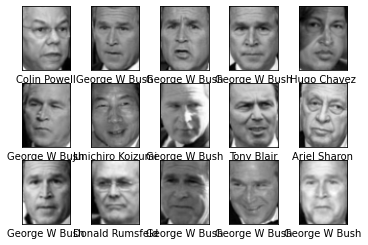

In [10]:
fig, ax = plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap="gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

# Data preprocessing

In [11]:
train_x, test_x, train_y, test_y = train_test_split(faces.data, faces.target, random_state=22)

In [12]:
# property 
print(train_x.shape)

(1011, 2914)


# Feature engineering

In [53]:
n_components = 50
pca = PCA(n_components=n_components, whiten=True).fit(train_x)

In [54]:
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

# Train model

In [85]:
svc = SVC(C=13, kernel='rbf', gamma=0.01)
svc.fit(train_x_pca, train_y)
yfit = svc.predict(test_x_pca)
print(classification_report(test_y, yfit))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        17
           1       0.83      0.93      0.88        58
           2       0.80      0.77      0.79        31
           3       0.90      0.94      0.92       129
           4       0.93      0.76      0.84        34
           5       0.94      0.71      0.81        21
           6       1.00      0.69      0.82        13
           7       0.79      0.79      0.79        34

    accuracy                           0.86       337
   macro avg       0.85      0.80      0.82       337
weighted avg       0.86      0.86      0.86       337



In [100]:
svc = SVC(C=10, kernel='poly', degree=1)
svc.fit(train_x_pca, train_y)
yfit = svc.predict(test_x_pca)
print(classification_report(test_y, yfit))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63        17
           1       0.85      0.86      0.85        58
           2       0.61      0.65      0.62        31
           3       0.83      0.86      0.85       129
           4       0.71      0.65      0.68        34
           5       0.92      0.52      0.67        21
           6       0.82      0.69      0.75        13
           7       0.70      0.76      0.73        34

    accuracy                           0.77       337
   macro avg       0.75      0.71      0.72       337
weighted avg       0.78      0.77      0.77       337



# model evaluation

In [26]:
# cross validation
param_grid = [
    {'kernel':['rbf'],'C':[1,5,10,15], 'gamma':[0.0001, 0.001, 0.01]},
    {'kernel':['poly'], 'C':[1,5,10,15],'gamma':['auto'], 'degree':[2,3,4]}
]
grid = GridSearchCV(SVC(),param_grid=param_grid, cv=3)

In [28]:
%time grid.fit(train_x_pca, train_y)

Wall time: 12.1 s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 5, 10, 15], 'gamma': [0.0001, 0.001, 0.01],
                          'kernel': ['rbf']},
                         {'C': [1, 5, 10, 15], 'degree': [2, 3, 4],
                          'gamma': ['auto'], 'kernel': ['poly']}])

In [29]:
grid.best_estimator_

SVC(C=10, gamma=0.001)

In [30]:
yfit_pca = grid.predict(test_x_pca)

In [31]:
print(classification_report(test_y,yfit_pca))

              precision    recall  f1-score   support

           0       0.59      0.76      0.67        17
           1       0.82      0.91      0.86        58
           2       0.86      0.77      0.81        31
           3       0.88      0.94      0.91       129
           4       0.88      0.85      0.87        34
           5       0.93      0.62      0.74        21
           6       0.82      0.69      0.75        13
           7       0.89      0.71      0.79        34

    accuracy                           0.85       337
   macro avg       0.83      0.78      0.80       337
weighted avg       0.85      0.85      0.85       337

